In [652]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager
import seaborn as sns

In [653]:
my_font = font_manager.FontProperties(fname="C:\Windows\Fonts\STSONG.TTF")

In [654]:
df = pd.read_csv("./input/archive/cwurData.csv", encoding="utf-8")
print(df.shape)
df.head(10)

(2200, 14)


,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012
5,6,Princeton University,USA,5,8,14,2,53,33,26,NaN,101,82.50,2012
6,7,University of Oxford,United Kingdom,2,13,28,9,15,13,19,NaN,26,82.34,2012
7,8,Yale University,USA,6,14,31,12,14,6,15,NaN,66,79.14,2012
8,9,Columbia University,USA,7,23,21,10,13,12,14,NaN,5,78.86,2012
9,10,"University of California, Berkeley",USA,8,16,52,6,6,5,3,NaN,16,78.55,2012


array([[<Axes: title={'center': 'world_rank'}>,
        <Axes: title={'center': 'national_rank'}>,
        <Axes: title={'center': 'quality_of_education'}>],
       [<Axes: title={'center': 'alumni_employment'}>,
        <Axes: title={'center': 'quality_of_faculty'}>,
        <Axes: title={'center': 'publications'}>],
       [<Axes: title={'center': 'influence'}>,
        <Axes: title={'center': 'citations'}>,
        <Axes: title={'center': 'broad_impact'}>],
       [<Axes: title={'center': 'patents'}>,
        <Axes: title={'center': 'score'}>,
        <Axes: title={'center': 'year'}>]], dtype=object)

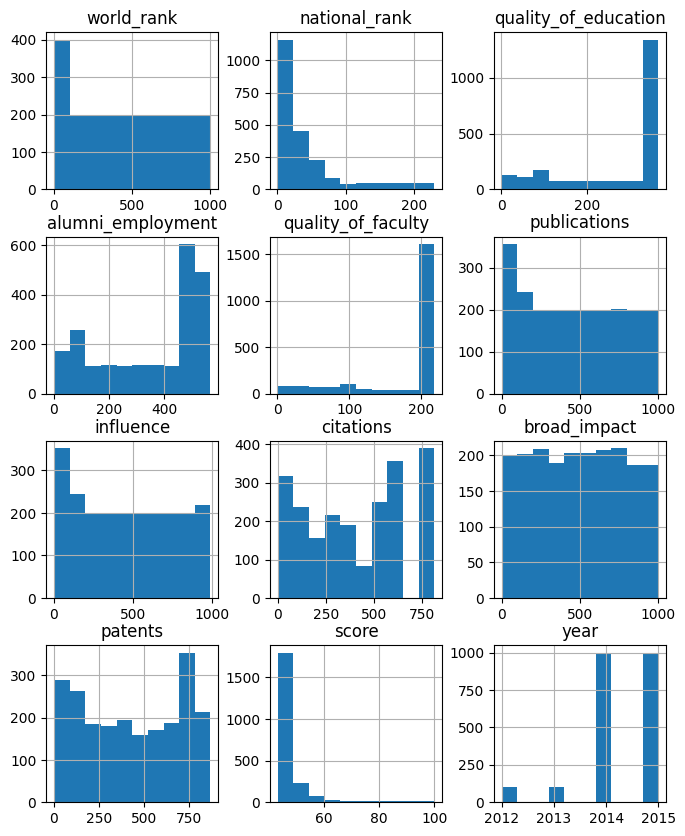

In [655]:
df.hist(figsize=(8, 10))

D:\jupyter\ipykernel_24396\3853755242.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap="YlGnBu", linewidths=.5, center=0)


Text(0.5, 1.0, '世界大学排行')

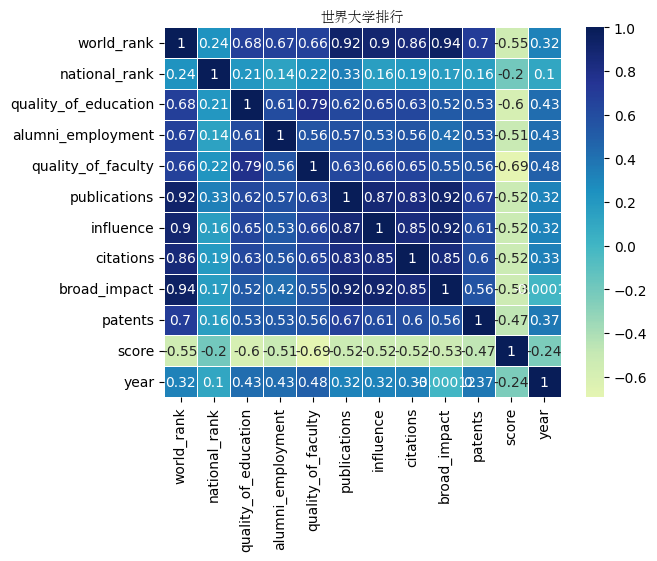

In [656]:
plt.figure(dpi=100)
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu", linewidths=.5, center=0)
plt.title('世界大学排行', fontproperties=my_font)

In [657]:
nihao = df.groupby(by=df["country"])["country"].count().sort_values()
nihao

country
Lebanon                   2
United Arab Emirates      2
Uganda                    2
Slovak Republic           2
Serbia                    2
Puerto Rico               2
Lithuania                 2
Iceland                   2
Estonia                   2
Cyprus                    2
Uruguay                   2
Bulgaria                  2
Croatia                   2
Romania                   3
Colombia                  4
Slovenia                  4
Mexico                    4
Singapore                 5
Thailand                  6
Malaysia                  6
Argentina                 7
Chile                     8
Egypt                     8
Saudi Arabia              8
Russia                    9
Czech Republic           10
South Africa             10
Hungary                  12
Denmark                  12
Hong Kong                12
Norway                   12
New Zealand              12
Greece                   14
Portugal                 14
Ireland                  16
Iran        

In [658]:
x = nihao.index
y = nihao.values
print(y)

[  2   2   2   2   2   2   2   2   2   2   2   2   2   3   4   4   4   5
   6   6   7   8   8   8   9  10  10  12  12  12  12  12  14  14  16  16
  18  20  20  20  22  24  24  26  29  31  36  46  58  72  72  81  96 109
 115 144 159 167 573]


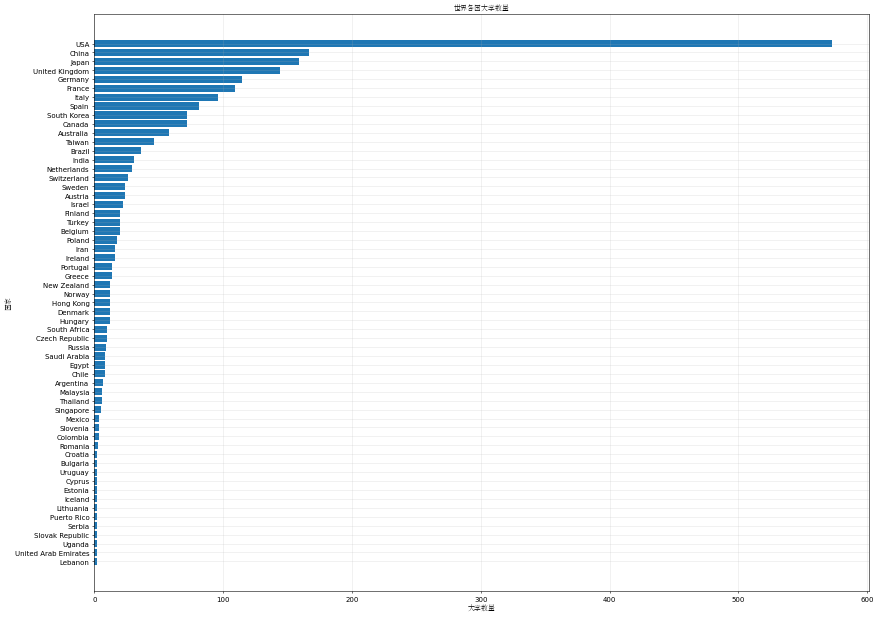

In [659]:
plt.figure(dpi=50, figsize=(20, 15))
plt.xticks()
plt.barh(x, y)
plt.ylabel("国家", fontproperties=my_font)
plt.xlabel("大学数量", fontproperties=my_font)
plt.title("世界各国大学数量", fontproperties=my_font)
plt.grid(alpha=0.3)
# 要写在show的前面
plt.savefig("./output/global_university_count.svg")
plt.show()

In [660]:
nihao2 = df.loc[:, ["country", "quality_of_faculty"]]
nihao2

,country,quality_of_faculty
0,USA,1
1,USA,3
2,USA,5
3,United Kingdom,4
4,USA,7
...,...,...
2195,Portugal,218
2196,Egypt,218
2197,Brazil,218
2198,Spain,218


In [661]:
nihao2 = df.groupby(by=df["country"])["quality_of_faculty"].mean().sort_values()
nihao2

country
Israel                   80.181818
Switzerland             103.961538
Denmark                 143.000000
Norway                  144.333333
USA                     145.228621
Sweden                  149.375000
Russia                  160.111111
United Kingdom          166.750000
Belgium                 173.000000
Netherlands             175.862069
France                  181.174312
Germany                 181.600000
Canada                  182.375000
Portugal                187.000000
Japan                   187.943396
Finland                 188.600000
Saudi Arabia            190.875000
South Africa            191.300000
Singapore               191.400000
Australia               192.724138
Austria                 193.625000
Hungary                 194.583333
Hong Kong               195.333333
Italy                   197.364583
Argentina               203.142857
Czech Republic          203.800000
Egypt                   205.000000
Poland                  206.611111
South Korea 

In [662]:
x = nihao2.index
y = nihao2.values

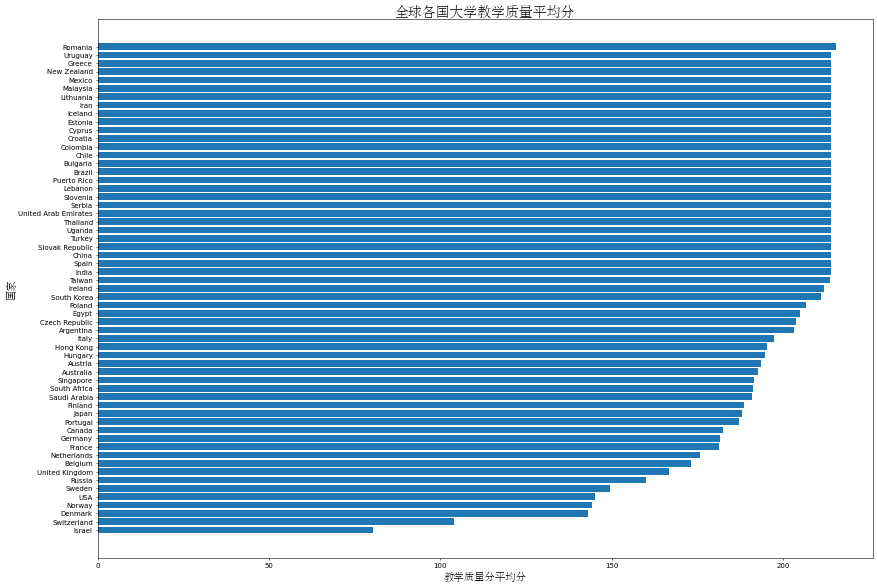

In [663]:
plt.figure(figsize=(20, 14), dpi=50)

plt.barh(x, y)
plt.xlabel("教学质量分平均分", fontproperties=my_font, fontsize=15)
plt.ylabel("国家", fontproperties=my_font, fontsize=15)
plt.savefig("./output/university_avarge_quality_of_faculty")
plt.title("全球各国大学教学质量平均分", fontproperties=my_font, fontsize=20)
plt.show()

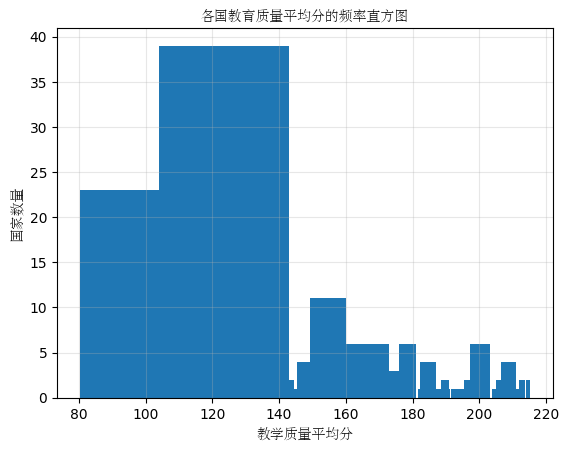

In [664]:
plt.figure(dpi=100)
plt.hist(range(int(min(y) - 1), int(max(y) + 1)), y)
plt.grid(alpha=0.3)
plt.title("各国教育质量平均分的频率直方图", fontproperties=my_font)
plt.xlabel("教学质量平均分", fontproperties=my_font)
plt.ylabel("国家数量", fontproperties=my_font)
plt.show()

In [665]:
nihao3 = df.groupby(by=df["year"])["quality_of_faculty"].mean()
nihao3

year
2012     56.930
2013     56.060
2014    188.002
2015    194.253
Name: quality_of_faculty, dtype: float64

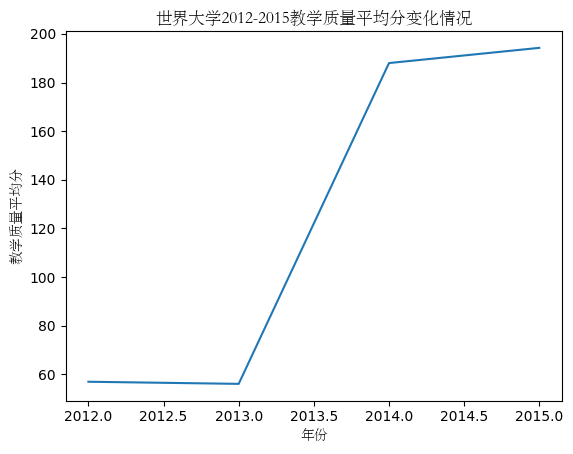

In [666]:
x = nihao3.index
y = nihao3.values

plt.title("世界大学2012-2015教学质量平均分变化情况", fontproperties=my_font, fontsize=12)
plt.xlabel("年份", fontproperties=my_font)
plt.ylabel("教学质量平均分", fontproperties=my_font)
plt.plot(x, y)
plt.show()

In [667]:
data3 = df[df["country"] == "China"]
data3 = data3[data3["world_rank"] <= 500]
print(data3.shape)
data3

(50, 14)


,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
254,55,Peking University,China,1,355,35,210,65,155,250,155.0,7,55.30,2014
286,87,Tsinghua University,China,2,294,63,210,79,192,134,162.0,16,52.60,2014
388,189,Fudan University,China,3,355,126,210,120,264,310,230.0,100,48.14,2014
394,195,Shanghai Jiao Tong University,China,4,325,149,210,102,250,250,234.0,138,48.02,2014
405,206,Zhejiang University,China,5,355,293,210,86,318,493,290.0,94,47.76,2014
416,217,Nanjing University,China,6,331,447,210,148,371,363,288.0,57,47.67,2014
441,242,Dalian University of Technology,China,7,355,67,210,326,666,406,472.0,74,47.22,2014
469,270,University of Science and Technology of China,China,8,355,238,210,144,275,363,266.0,481,46.75,2014
491,292,Sun Yat-sen University,China,9,355,328,210,198,424,310,313.0,138,46.42,2014
548,349,Nankai University,China,10,318,168,210,311,456,493,361.0,280,45.87,2014


In [668]:
nihao4 = data3.groupby(by=data3["year"])["institution"].count().sort_values()
nihao4

year
2014    23
2015    27
Name: institution, dtype: int64

In [669]:
data5 = df[df["country"] == "Japan"]
data5 = data5[data5["world_rank"] <= 500]
print(data5.shape)
data5

(62, 14)


,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
13,14,University of Tokyo,Japan,1,32,19,31,8,19,23,NaN,3,69.49,2012
16,17,Kyoto University,Japan,2,42,38,19,25,36,43,NaN,23,65.76,2012
31,32,Osaka University,Japan,3,77,101,44,39,44,51,NaN,11,54.43,2012
73,74,Nagoya University,Japan,4,56,101,69,101,101,101,NaN,46,46.89,2012
78,79,Tohoku University,Japan,5,53,101,101,49,100,67,NaN,29,45.82,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1667,468,Niigata University,Japan,20,367,285,218,527,514,511,447.0,238,44.88,2015
1672,473,Nihon University,Japan,21,301,565,218,599,588,812,637.0,113,44.86,2015
1673,474,Osaka City University,Japan,22,108,414,218,484,536,321,471.0,374,44.86,2015
1680,481,Tokyo University of Science,Japan,23,367,567,218,530,530,428,457.0,191,44.84,2015


In [670]:
nihao5 = data5.groupby(by=data5["year"])["institution"].count()
nihao5

year
2012     5
2013     6
2014    27
2015    24
Name: institution, dtype: int64

In [671]:
data6 = df[df["country"] == "USA"]
data6 = data6[data6["world_rank"] <= 500]
print(data6.shape)
data6

(433, 14)


,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012
5,6,Princeton University,USA,5,8,14,2,53,33,26,NaN,101,82.50,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1679,480,Illinois Institute of Technology,USA,154,274,114,218,784,713,511,715.0,861,44.85,2015
1682,483,Clemson University,USA,155,367,535,218,433,497,645,396.0,510,44.83,2015
1687,488,University of Hawaii at Manoa,USA,156,367,435,153,448,213,368,457.0,490,44.82,2015
1688,489,University of Nebraska Omaha,USA,157,367,365,218,704,606,428,396.0,871,44.81,2015


In [672]:
nihao6 = data6.groupby(by=data6["year"])["institution"].count()
nihao6

year
2012     58
2013     57
2014    160
2015    158
Name: institution, dtype: int64

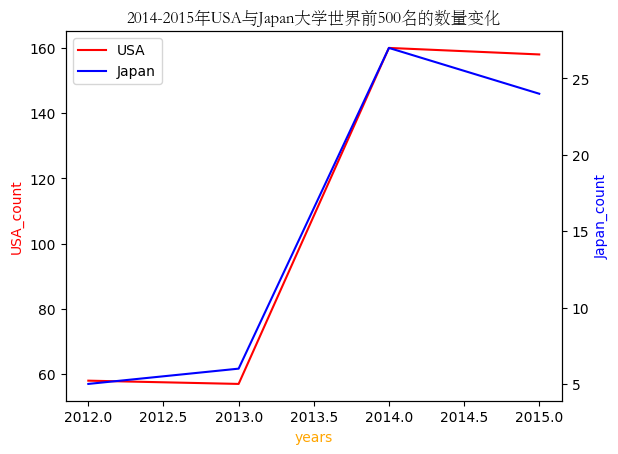

In [673]:
x1 = nihao6.index
y1 = nihao6.values

x2 = nihao5.index
y2 = nihao5.values

fig, ax1 = plt.subplots()

color1 = "red"
plt.title("2014-2015年USA与Japan大学世界前500名的数量变化", fontproperties=my_font, fontsize=12)
ax1.set_xlabel("years", color="orange")
ax1.set_ylabel("USA_count", color=color1)
line1 = ax1.plot(x1, y1, label="USA", color=color1)
# ax1.tick_params(axis="y", labelcolor=color1)

color2 = "blue"
ax2 = ax1.twinx()
ax2.set_ylabel("Japan_count", color=color2)
line2 = ax2.plot(x2, y2, label="Japan", color=color2)
# ax2.tick_params(axis="y", labelcolor=color2)

# 合并label
lns = line1 + line2
labs = [l.get_label() for l in lns]

# 绘制label
ax1.legend(lns, labs, loc="best")
plt.savefig("./output/")
plt.show()

In [674]:
data4 = df[df["country"] == "China"]
data8 = data4[data4["year"] == 2014].sample(frac=1)
data7 = data4[data4["year"] == 2015].sample(frac=1)
# data7 = data4[data4["year"] == 2015].sample(frac=1)
data7

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
1438,239,University of Science and Technology of China,China,6,367,192,218,128,269,368,247.0,452,46.73,2015
1622,423,Peking Union Medical College,China,21,367,567,218,324,297,368,358.0,797,45.09,2015
2085,886,Nanjing Medical University,China,58,367,567,218,582,696,812,867.0,761,44.14,2015
2082,883,Hefei University of Technology,China,57,367,302,218,914,974,812,932.0,871,44.15,2015
1588,389,Xi'an Jiaotong University,China,13,367,154,218,271,583,812,606.0,174,45.21,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1678,479,Sichuan University,China,26,367,563,218,269,478,645,447.0,597,44.85,2015
2156,957,Third Military Medical University,China,71,367,567,218,737,809,645,932.0,721,44.07,2015
1905,706,Fuzhou University,China,41,367,399,218,727,984,428,671.0,463,44.35,2015
2192,993,Southwest Jiaotong University,China,82,367,327,218,937,962,812,998.0,861,44.03,2015


D:\jupyter\ipykernel_24396\695675985.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(x2, rotation=90)
D:\jupyter\ipykernel_24396\695675985.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(x2, rotation=90)


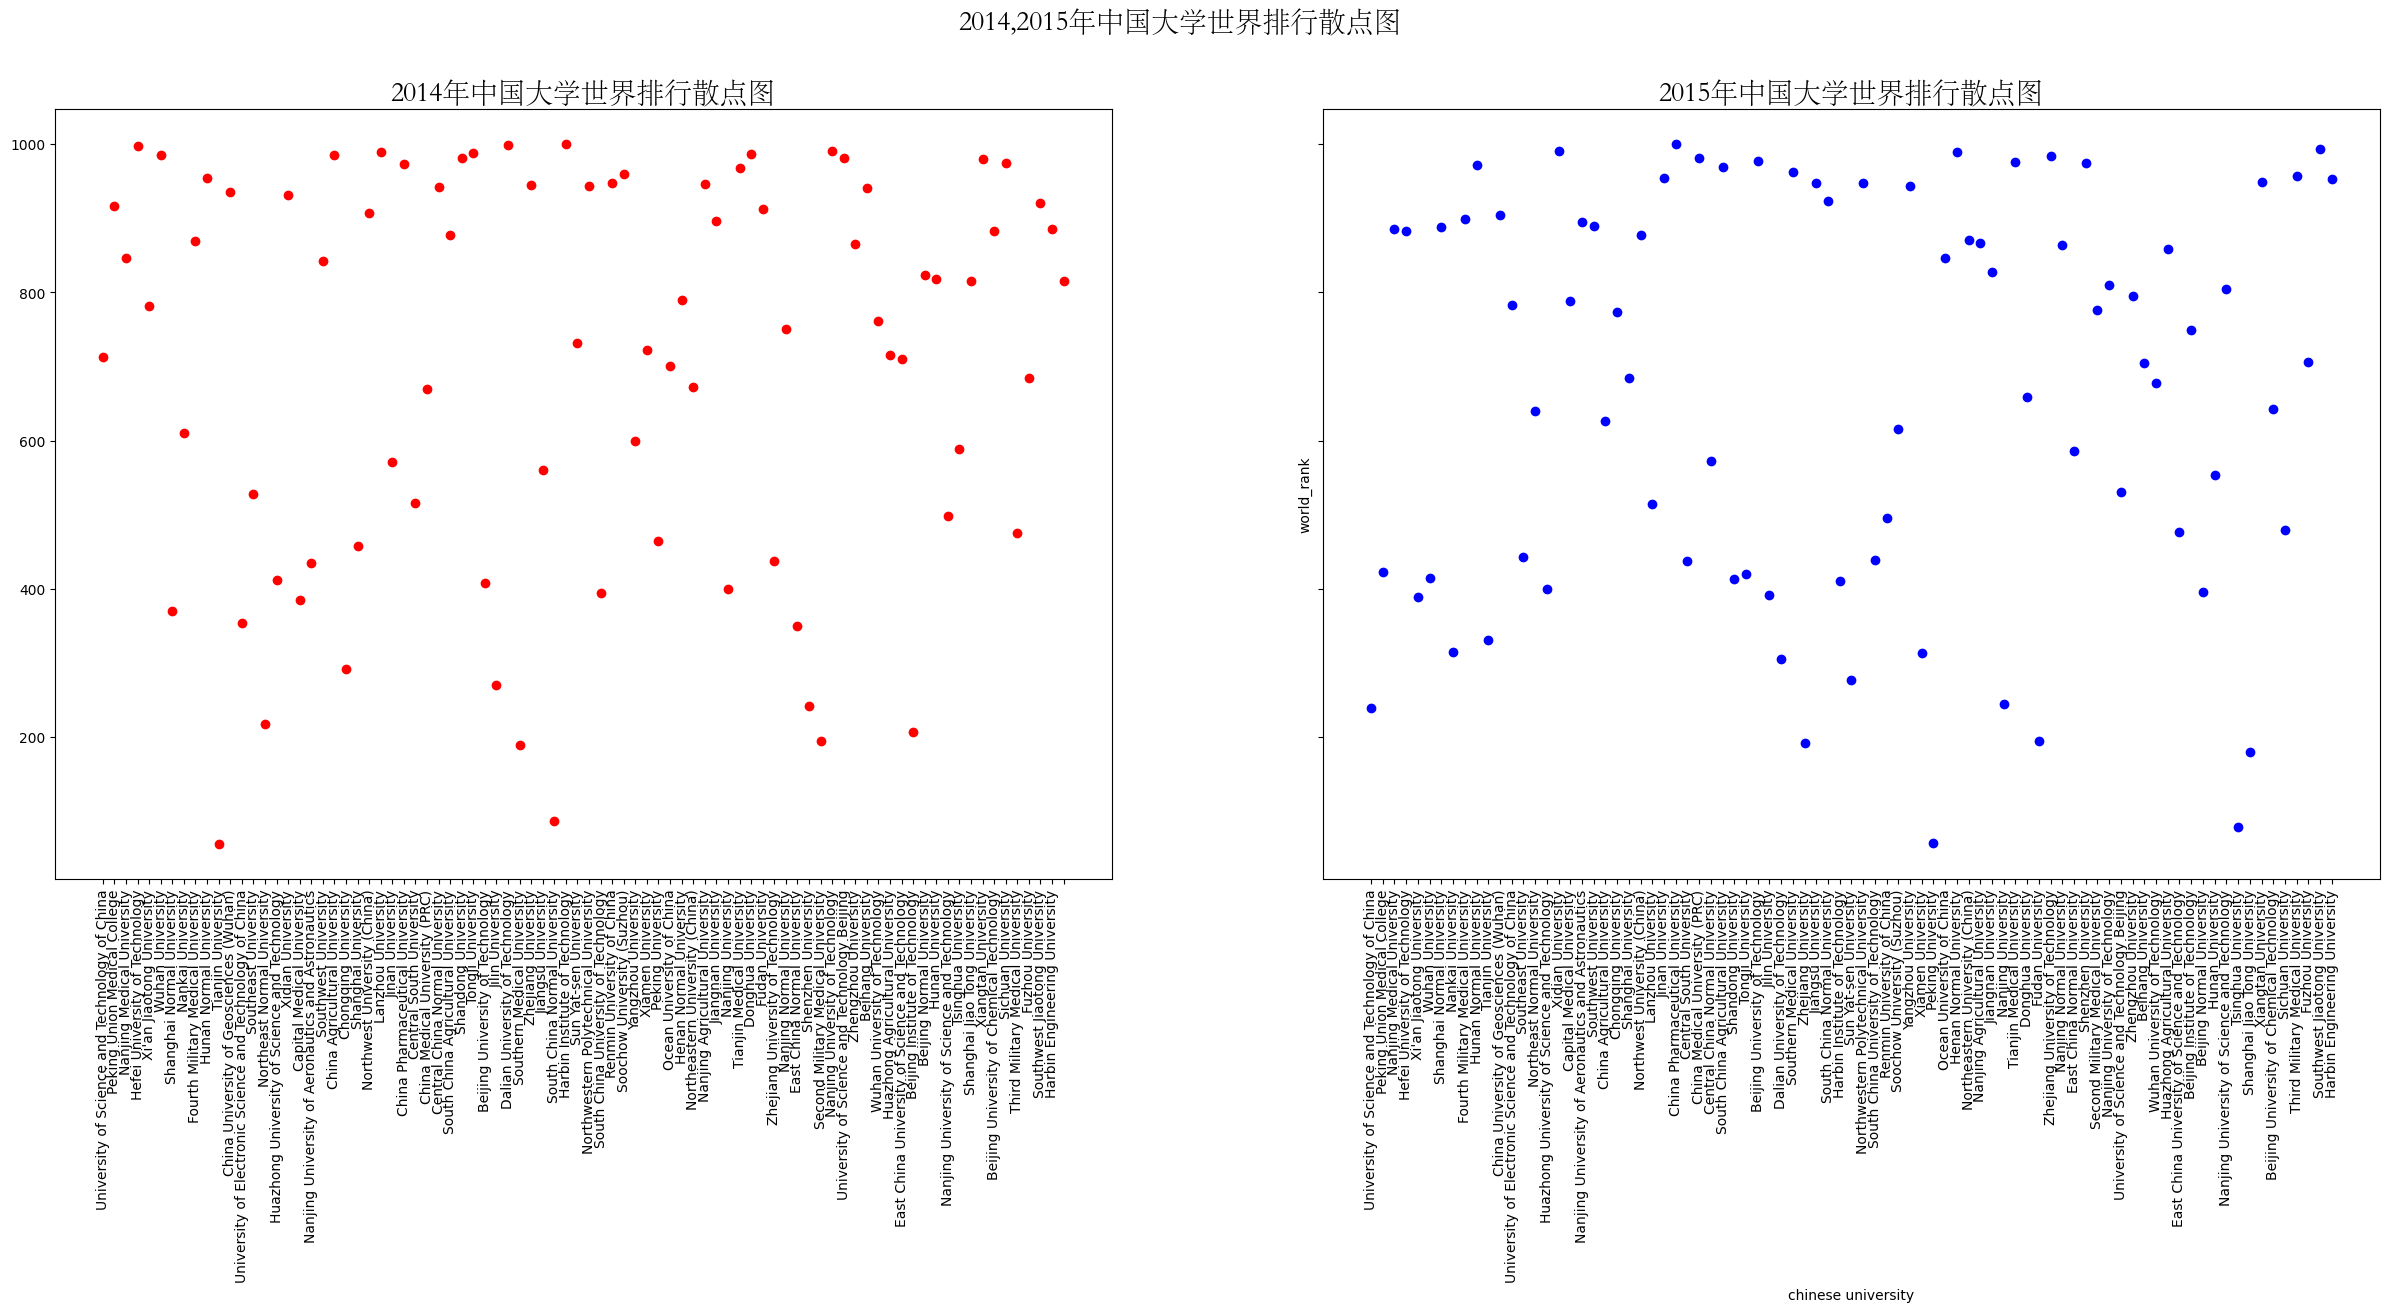

In [675]:
y1 = data8.world_rank
x1 = data8.institution

x2 = data7.institution
y2 = data7.world_rank

fig, (ax1, ax2) = plt.subplots(1, 2, dpi=100, sharey=True, figsize=(30, 10))
ax1.set_title("2014年中国大学世界排行散点图", fontproperties=my_font, fontsize=20)
ax1.set_xticklabels(x2, rotation=90)
plt.xlabel("chinese university")
plt.ylabel("world_rank")
ax1.scatter(x1, y1, color=color1, label="2014")

ax2.set_title("2015年中国大学世界排行散点图", fontproperties=my_font, fontsize=20)
ax2.set_xlabel("chinese university")
ax2.set_xticklabels(x2, rotation=90)
ax2.scatter(x2, y2, color=color2, label="2015")

fig.suptitle('2014,2015年中国大学世界排行散点图', fontproperties=my_font, fontsize=20)

# 调整图与图的间距
fig.subplots_adjust(hspace=0.01)
plt.show()

In [676]:
for i in range(len(list(data8.institution))):
    if list(data8.institution)[i] not in list(data7.institution):
        print(list(data8.institution)[i])

x = list(data8.institution)
y1 = list(data8.world_rank)  #2014 84
y2 = list(data7.world_rank)  #2015 83

print(len(y1), len(y2))

Shaanxi Normal University
Guangxi University
Harbin Medical University
Shanxi University
National University of Defense Technology
Yanbian University
Beijing Jiaotong University
Northwest A&F University
Zhejiang Normal University
84 83


In [677]:
data5 = df[(df["institution"] == "Zhejiang University of Technology") |
           (df["institution"] == "Zhejiang Normal University") | (df["institution"] == "Zhejiang University")]
data5

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
405,206,Zhejiang University,China,5,355,293,210,86,318,493,290.0,94,47.76,2014
1180,981,Zhejiang University of Technology,China,74,355,478,210,917,987,800,966.0,637,44.28,2014
1190,991,Zhejiang Normal University,China,81,355,478,210,905,932,800,979.0,737,44.26,2014
1390,191,Zhejiang University,China,4,367,309,218,71,290,368,265.0,106,47.66,2015
2183,984,Zhejiang University of Technology,China,79,367,567,218,858,991,812,958.0,672,44.04,2015
